<a href="https://colab.research.google.com/github/ektaarora3501/tensorflow/blob/master/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu


In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from google.colab import files
uploaded=files.upload()


Saving kc_house_data.csv to kc_house_data.csv


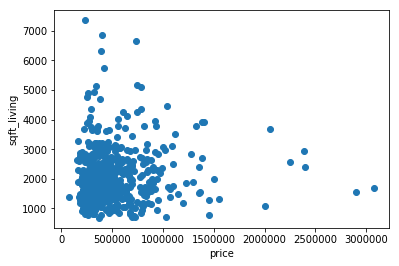

          2
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0       5
0  1030
1  1700
2  1480
3  4250
4  1600


In [43]:
import io
df2=io.BytesIO(uploaded['kc_house_data.csv'])
x_train=pd.read_csv(df2,nrows=1000,usecols=[2],skiprows=[0],header=None)
y_train=pd.read_csv(df2,nrows=1000,usecols=[5],skiprows=[0],header=None)
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(x_train,y_train)
plt.show()
print(x_train.head(),y_train.head())

w_value 0.0032780309979838647


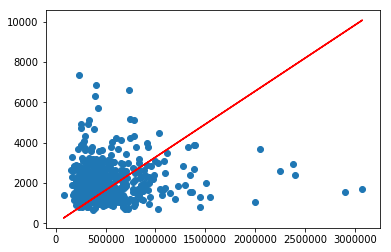

y_train       5
0  1030
1  1700
2  1480
3  4250
4  1600
5  1870
6  1440
7  2720
8  1240
9  1020
x_train            2
0   221900.0
1   538000.0
2   180000.0
3   604000.0
4   510000.0
5  1225000.0
6   257500.0
7   291850.0
8   229500.0
9   323000.0
y_learned              2
0   727.395078
1  1763.580677
2   590.045580
3  1979.930723
4  1671.795809
5  4015.587973
6   844.092982
7   956.693347
8   752.308114
9  1058.804012


In [112]:
learning_rate=0.001
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)
n_samples=x_train.shape[0]
def model(X,w):
  return tf.multiply(X,w)

w=tf.Variable(0.0,name="weight")
y_model=model(X,w)
cost = tf.reduce_sum(Y-y_model)

train_op=tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(cost)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

for i in range(0,1000):
  for (x,y) in zip(x_train,y_train):
    sess.run(train_op,feed_dict={X:x_train,Y:y_train})
    
w_val=(sess.run(w))/10**11.9
print('w_value',w_val)
y_learned=x_train*w_val
plt.plot(x_train,y_learned,'r')
plt.scatter(x_train,y_train)
plt.show()
print('y_train',y_train.head(n=10))
print('x_train',x_train.head(n=10))
print('y_learned',y_learned.head(n=10))


